In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from MinorityGameComplex import GameSimulationImitationCG

# A. Testing evolution of the average gain and succes rate

In [84]:
S=2
M=10
N=5001
Ncop=1
dynT=2500
T=5000
A, successrate, G, GI, SI, imitator, ha_imitado, numstrat = GameSimulationImitationCG(S, M, N, Ncop, T, dynT)

In [85]:
imitator[0], ha_imitado[ha_imitado>0][:-1].astype(int), numstrat[numstrat>-1][:-1].astype(int)

(437, array([4472]), array([0]))

In [86]:
S_imitator_1 = SI[np.arange(T),imitator,0]
S_imitator_2 = SI[np.arange(T),imitator,1]
"""S_imitated_1 = SI[np.arange(T),int(ha_imitado[dynT-1]),0]
S_imitated_2 = SI[np.arange(T),int(ha_imitado[dynT-1]),1]"""

'S_imitated_1 = SI[np.arange(T),int(ha_imitado[dynT-1]),0]\nS_imitated_2 = SI[np.arange(T),int(ha_imitado[dynT-1]),1]'

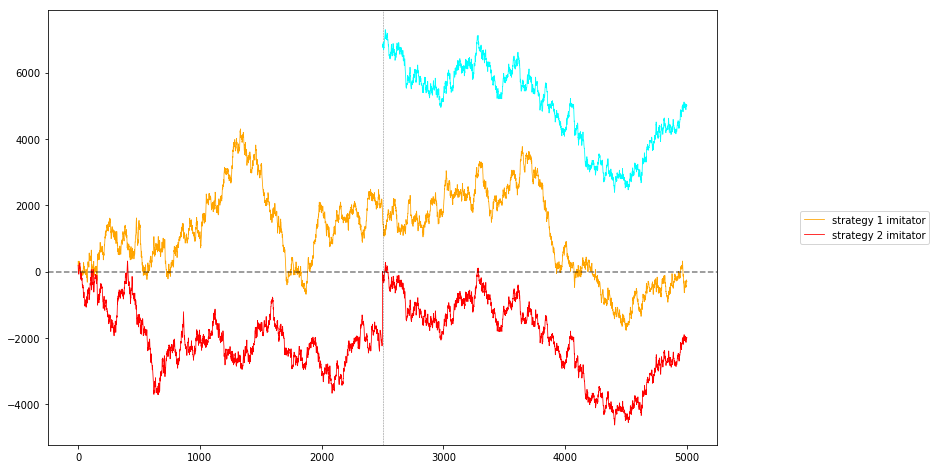

In [87]:
fig, ax = plt.subplots(figsize=(12,8))
#ax.set(xscale='log', xlabel=r'$N_{cops}$')
#ax.set_xlim([100,1000])
#ax.set_ylim([-250,500])
#ax.text(x=100,y=2500,s='Imitated score')
#ax.arrow(500, 2400, 300, -500, head_width=50, head_length=70, fc='k', ec='k')
ax.plot(np.arange(1,T), S_imitator_1[:-1], c='orange', alpha= 1,
        marker='', ls='-', lw=.8, label='strategy 1 imitator')
ax.plot(np.arange(1,T), S_imitator_2[:-1], c='red', alpha= 1,
        marker='', ls='-', lw=.8, label='strategy 2 imitator')

for i in range(int(T/dynT)-1):
    ax.axvline(x=dynT*(i+1), linestyle='--', lw=.5, color='k', alpha=0.5)
    cual = ha_imitado[ha_imitado>0][:-1].astype(int)[i]
    desdehasta = np.arange(dynT*(i+1),dynT*(i+2))
    ax.plot(desdehasta, 
            SI[desdehasta,cual,numstrat[numstrat>-1][:-1].astype(int)[i]], 
                                  c='cyan', alpha= 1,
        marker='', ls='-', lw=.8)#, label='strategy 1 imitated')
ax.axhline(y=0, linestyle='--', color='k', alpha=0.5)
ax.legend(loc = 'center', bbox_to_anchor= (1.22, .5))
#filename = "Example strategy evolution and imitation.png"
#fig.savefig(filename, bbox_inches='tight')

In [88]:
Successrates = np.zeros((N,T))
cum = np.zeros(N)
for t in range(T):
    cum += successrate[t]
    Successrates[np.arange(N), t] = cum/(t+1)

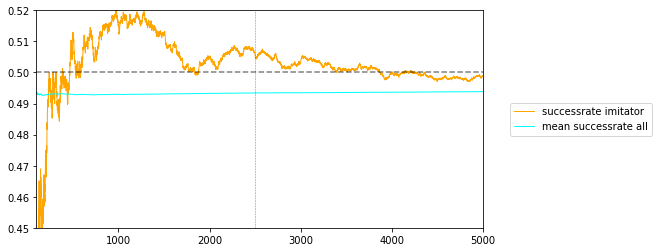

In [89]:
fig, ax = plt.subplots(figsize=(8,4))
#ax.set(xscale='log', xlabel=r'$N_{cops}$')
ax.set_xlim([100,5000])
ax.set_ylim([0.45,0.52])
#ax.text(x=100,y=2500,s='Imitated score')
#ax.arrow(500, 2400, 300, -500, head_width=50, head_length=70, fc='k', ec='k')
ax.plot(np.arange(1, T+1), Successrates[imitator[0]], c='orange', alpha= 1,
        marker='', ls='-', lw=1, label='successrate imitator')
"""ax.plot(np.arange(1, T+1), Successrates[int(ha_imitado[dynT-1])], c='red', alpha= 1,
        marker='', ls='-', lw=1, label='successrate imitated')"""
ax.plot(np.arange(1, T+1), np.mean(Successrates,axis=0), c='cyan', alpha= 1,
        marker='', ls='-', lw=1, label='mean successrate all')
ax.axhline(y=0.5, linestyle='--', color='k', alpha=0.5)
for i in range(int(T/dynT)-1):
    ax.axvline(x=dynT*(i+1), linestyle='--', lw=.5, color='k', alpha=0.5)
ax.legend(loc = 'center', bbox_to_anchor= (1.22, .5))
#filename = "Example strategy evolution and imitation.png"
#fig.savefig(filename, bbox_inches='tight')

In [55]:
gainimitator = []
gainsimitated = []
gains = []
for i in range(T):
    gainimitator.append(np.mean(GI[:(i+1)]))
    gains.append(np.mean(G[:(i+1)]))

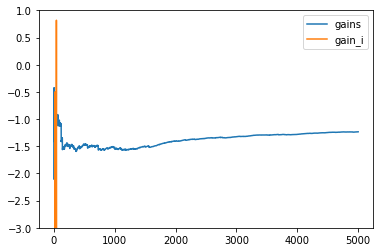

In [59]:
fig, ax = plt.subplots()
#ax.set(xscale='log', xlabel=r'$N_{cops}$')
#ax.set_xlim([300,5000])
ax.set_ylim([-3,1])
ax.plot(np.arange(T), gains, label='gains')
ax.plot(np.arange(T), gainimitator, label='gain_i')
#ax.plot(np.arange(T), G)
ax.legend()

In [140]:
a = np.array([1,2,3,4,5])

In [142]:
(a/a).astype(int)

array([1, 1, 1, 1, 1])

# B. Ponderations extensive

In [3]:
S=2
M=8
N=201
Ncop=10
dynT=1000
T=10000
ponderas = 10
imprime = 1
print('alpha={:.4f}'.format(2**M/N))
meangains=np.zeros(T-1)
meangainimi=np.zeros(T-1)
for i in range(ponderas):
    A, G, GC = GameSimulationImitationCG(S, M, N, Ncop, T, dynT)
    if (i+1)%imprime==0:
        print(' - Pondera nº{}/{}'.format(i+1,ponderas))
        print('          <g(T)> = {}'.format(meangains[-1]/(i+1)))
        print('        <g_I(T)> = {}'.format(meangainimi[-1]/(i+1)))
    for t in range(T-1):
        meangains[t] += np.mean(G[:(t+1)])
        meangainimi[t] += np.mean(GC[:(t+1)])
meangains = meangains/ponderas
meangainimi = meangainimi/ponderas

alpha=1.2736
 - Pondera nº1/10
          <g(T)> = 0.0
        <g_I(T)> = 0.0
 - Pondera nº2/10
          <g(T)> = -0.22799005788903762
        <g_I(T)> = -0.030503050305030505
 - Pondera nº3/10
          <g(T)> = -0.30235070884415005
        <g_I(T)> = -0.17745107844117744
 - Pondera nº4/10
          <g(T)> = -0.32473691531589705
        <g_I(T)> = -0.19910741074107408
 - Pondera nº5/10
          <g(T)> = -0.3683688165770892
        <g_I(T)> = -0.19916991699169914
 - Pondera nº6/10
          <g(T)> = -0.3860749019064343
        <g_I(T)> = -0.39093075974264097
 - Pondera nº7/10
          <g(T)> = -0.39481932239634404
        <g_I(T)> = -0.398997042561399
 - Pondera nº8/10
          <g(T)> = -0.4010104690672113
        <g_I(T)> = -0.5155640564056406
 - Pondera nº9/10
          <g(T)> = -0.4048821125767399
        <g_I(T)> = -0.5629618517407297
 - Pondera nº10/10
          <g(T)> = -0.410513589430009
        <g_I(T)> = -0.535978597859786


In [103]:
#meangains0 = meangains.copy()
#meangainimiFIRST = meangainimi.copy() #1000 first time steps with more averages

In [105]:
meangainimi[np.arange(len(meangainimiFIRST))] = meangainimiFIRST

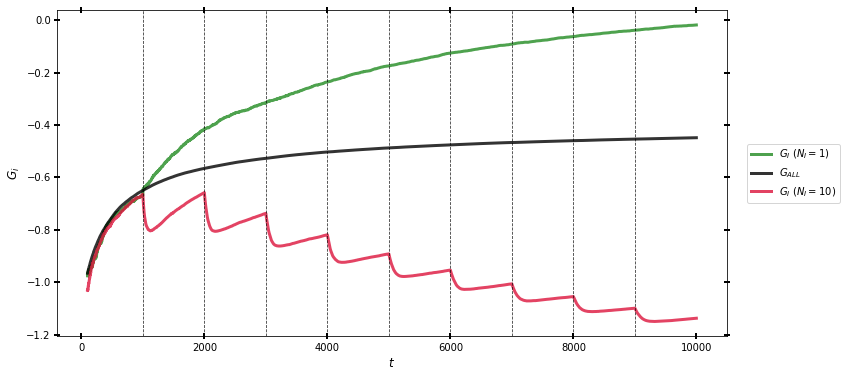

In [109]:
fig, ax = plt.subplots(1, figsize=(12,6))
#ax.set_xscale('log')
#ax.set_yscale('log')

ax.set_xlabel(r'$t$', fontsize='large')
ax.set_ylabel(r'$G_i$', fontsize='large')

ax.tick_params(which='minor', direction = 'inout', length=3, width=1,
              labelbottom=False, labeltop=False, labelleft=False, labelright=False,
                  bottom=True, top=True, left=True, right=True)

ax.tick_params(which='major', direction = 'inout', length=6, width = 2,
                  labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                  bottom=True, top=True, left=True, right=True)

cols = ['dodgerblue', 'yellowgreen', 'crimson', 'forestgreen', 'cyan', 'darkblue']

lin12, = ax.plot(np.arange(101,10000-1), meangainimi[100:-1], lw=3, ls = '-', color = cols[3], alpha=.8)
lin101, = ax.plot(np.arange(101,10000-1), meangains0[100:-1], lw=3, ls = '-', color = 'k', alpha=.8)
lin102, = ax.plot(np.arange(101,10000-1), meangainimi10[100:-1], lw=3, ls = '-', color = cols[2], alpha=.8)

"""xticks1 = [0.1, 1, 10]
ax.set_xticks(xticks1)
ax.set_xticklabels([str(i) for i in xticks1])"""

#ax.axhline(y=0, xmin=0, xmax=1, color='k', alpha=0.7, linestyle='--')
for i in range(int(T/dynT)-1):
    ax.axvline(x=dynT*(i+1), linestyle='--', lw=.8, color='k', alpha=.8)

labels = [r'$G_{I}$ ($N_I=1$)', r'$G_{ALL}$', r'$G_{I}$ ($N_I=10$)']
ax.legend([(lin12,), (lin101,), (lin102,)], labels, loc='center', bbox_to_anchor=[1.1,0.5])

#ax.set_ylim([-1.1,-0.6])

filename = 'meanscorevolution_8M,201N,1,10Ncop,1000dynT,10000T,300pond.png'
fig.savefig(filename, bbox_inches='tight')

In [70]:
S=2
M=8
N=201
Ncop=20
dynT=1000
T=1000000
ponderas = 10
imprime = 1
print('alpha={:.4f}'.format(2**M/N))
meangains=np.zeros(T)
meangainimi=np.zeros(T)
for i in range(ponderas):
    A, G, GC = GameSimulationImitationCG(S, M, N, Ncop, T, dynT)
    for t in range(T):
        if t<1000:
            meangains[t] += np.mean(G[:(t+1)])
            meangainimi[t] += np.mean(GC[:(t+1)])
        else:
            meangains[t] += np.mean(G[(t-999):t])
            meangainimi[t] += np.mean(GC[(t-999):t])
            
    if (i+1)%imprime==0:
        print(' - Pondera nº{}/{}'.format(i+1,ponderas))
        print('          <g(T)> = {}'.format(meangains[-1]/(i+1)))
        print('        <g_I(T)> = {}'.format(meangainimi[-1]/(i+1)))
meangains = meangains/ponderas
meangainimi = meangainimi/ponderas

alpha=1.2736
 - Pondera nº1/10
          <g(T)> = -0.39597055619155064
        <g_I(T)> = -0.5461461461461462
 - Pondera nº2/10
          <g(T)> = -0.33790696774122186
        <g_I(T)> = -2.0626126126126128
 - Pondera nº3/10
          <g(T)> = -0.3343914817211318
        <g_I(T)> = -2.3896563229896564
 - Pondera nº4/10
          <g(T)> = -0.3410039874128272
        <g_I(T)> = -2.7151651651651654
 - Pondera nº5/10
          <g(T)> = -0.33710506086196695
        <g_I(T)> = -2.961961961961962
 - Pondera nº6/10
          <g(T)> = -0.3467537519102897
        <g_I(T)> = -2.8956623289956624
 - Pondera nº7/10
          <g(T)> = -0.3412228329355401
        <g_I(T)> = -2.840554840554841
 - Pondera nº8/10
          <g(T)> = -0.3380355493615162
        <g_I(T)> = -2.6413288288288292
 - Pondera nº9/10
          <g(T)> = -0.3392066099248419
        <g_I(T)> = -2.442219997775554
 - Pondera nº10/10
          <g(T)> = -0.3382664432388189
        <g_I(T)> = -2.5616616616616623


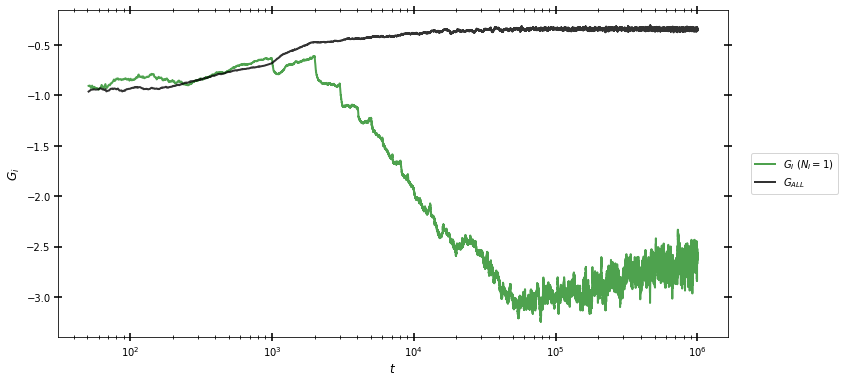

In [72]:
fig, ax = plt.subplots(1, figsize=(12,6))
ax.set_xscale('log')
#ax.set_yscale('log')

ax.set_xlabel(r'$t$', fontsize='large')
ax.set_ylabel(r'$G_i$', fontsize='large')

ax.tick_params(which='minor', direction = 'inout', length=4, width=0.8,
              labelbottom=False, labeltop=False, labelleft=False, labelright=False,
                  bottom=True, top=True, left=True, right=True)

ax.tick_params(which='major', direction = 'inout', length=8, width = 1.6,
                  labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                  bottom=True, top=True, left=True, right=True)

cols = ['dodgerblue', 'yellowgreen', 'crimson', 'forestgreen', 'cyan', 'darkblue']

lin12, = ax.plot(np.arange(51,T), meangainimi[50:-1], lw=2, ls = '-', color = cols[3], alpha=.8)
lin101, = ax.plot(np.arange(51,T), meangains[50:-1], lw=2, ls = '-', color = 'k', alpha=.8)

"""xticks1 = [0.1, 1, 10]
ax.set_xticks(xticks1)
ax.set_xticklabels([str(i) for i in xticks1])"""

#ax.axhline(y=0, xmin=0, xmax=1, color='k', alpha=0.7, linestyle='--')
#for i in range(int(T/dynT)):
#    ax.axvline(x=dynT*(i), linestyle='--', lw=.5, color='k', alpha=.5)

labels = [r'$G_{I}$ ($N_I=1$)', r'$G_{ALL}$']
ax.legend([(lin12,), (lin101,) ], labels, loc='center', bbox_to_anchor=[1.1,0.5])

#filename = 'meanscorevolution_8M,201N,1,10Ncop,1000dynT,10000T,300pond.png'
#fig.savefig(filename, bbox_inches='tight')